#**This notebook gives you starter code to use the Yelp FUSION API to extract data about businesses, reviews, users and more. You should review the datacamp chapter as indicated in the image below, before starting this exercise.

Create a copy of this notebook and follow the steps below


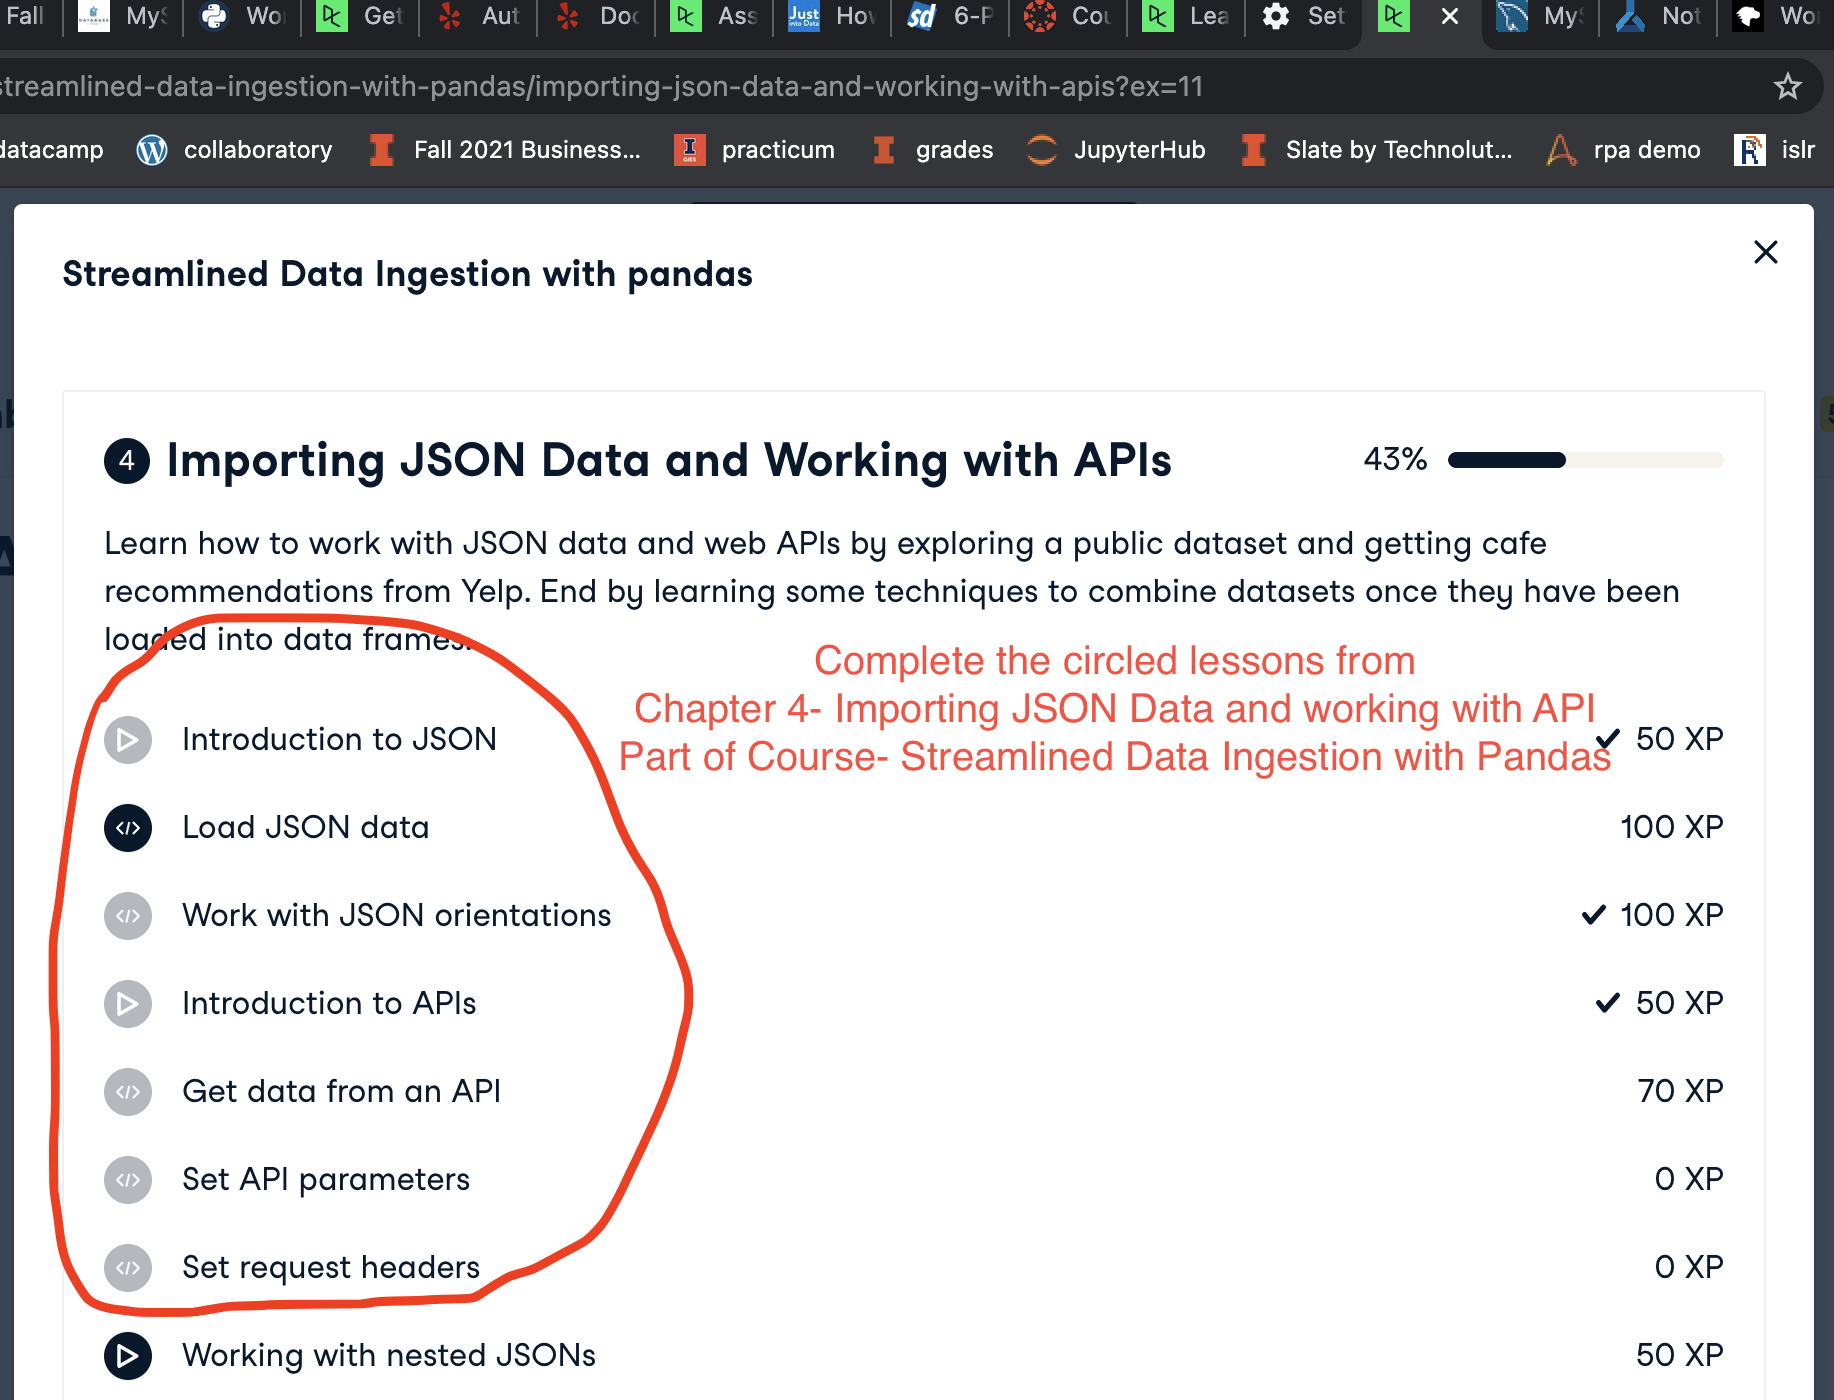

# To understand what is an API, please refer to https://www.mulesoft.com/resources/api/what-is-an-api




# For an interesting read on how API calls can be used to scrape data from the web (includes basic knowledge of JSON and Python) refer to https://towardsdatascience.com/json-and-apis-with-python-fba329ef6ef0

# **Let's start with importing some libraries to extract data from Yelp Fusion API**

In [ ]:
# standard Python library for handling HTTP is requests
import requests

#import pandas 
import pandas as pd

Go to https://www.yelp.com/login?return_url=%2Fdevelopers%2Fv3%2Fmanage_app and Log In (You can use the 'Continue with Google' option)

Now you can create a new app using dummy values like so -
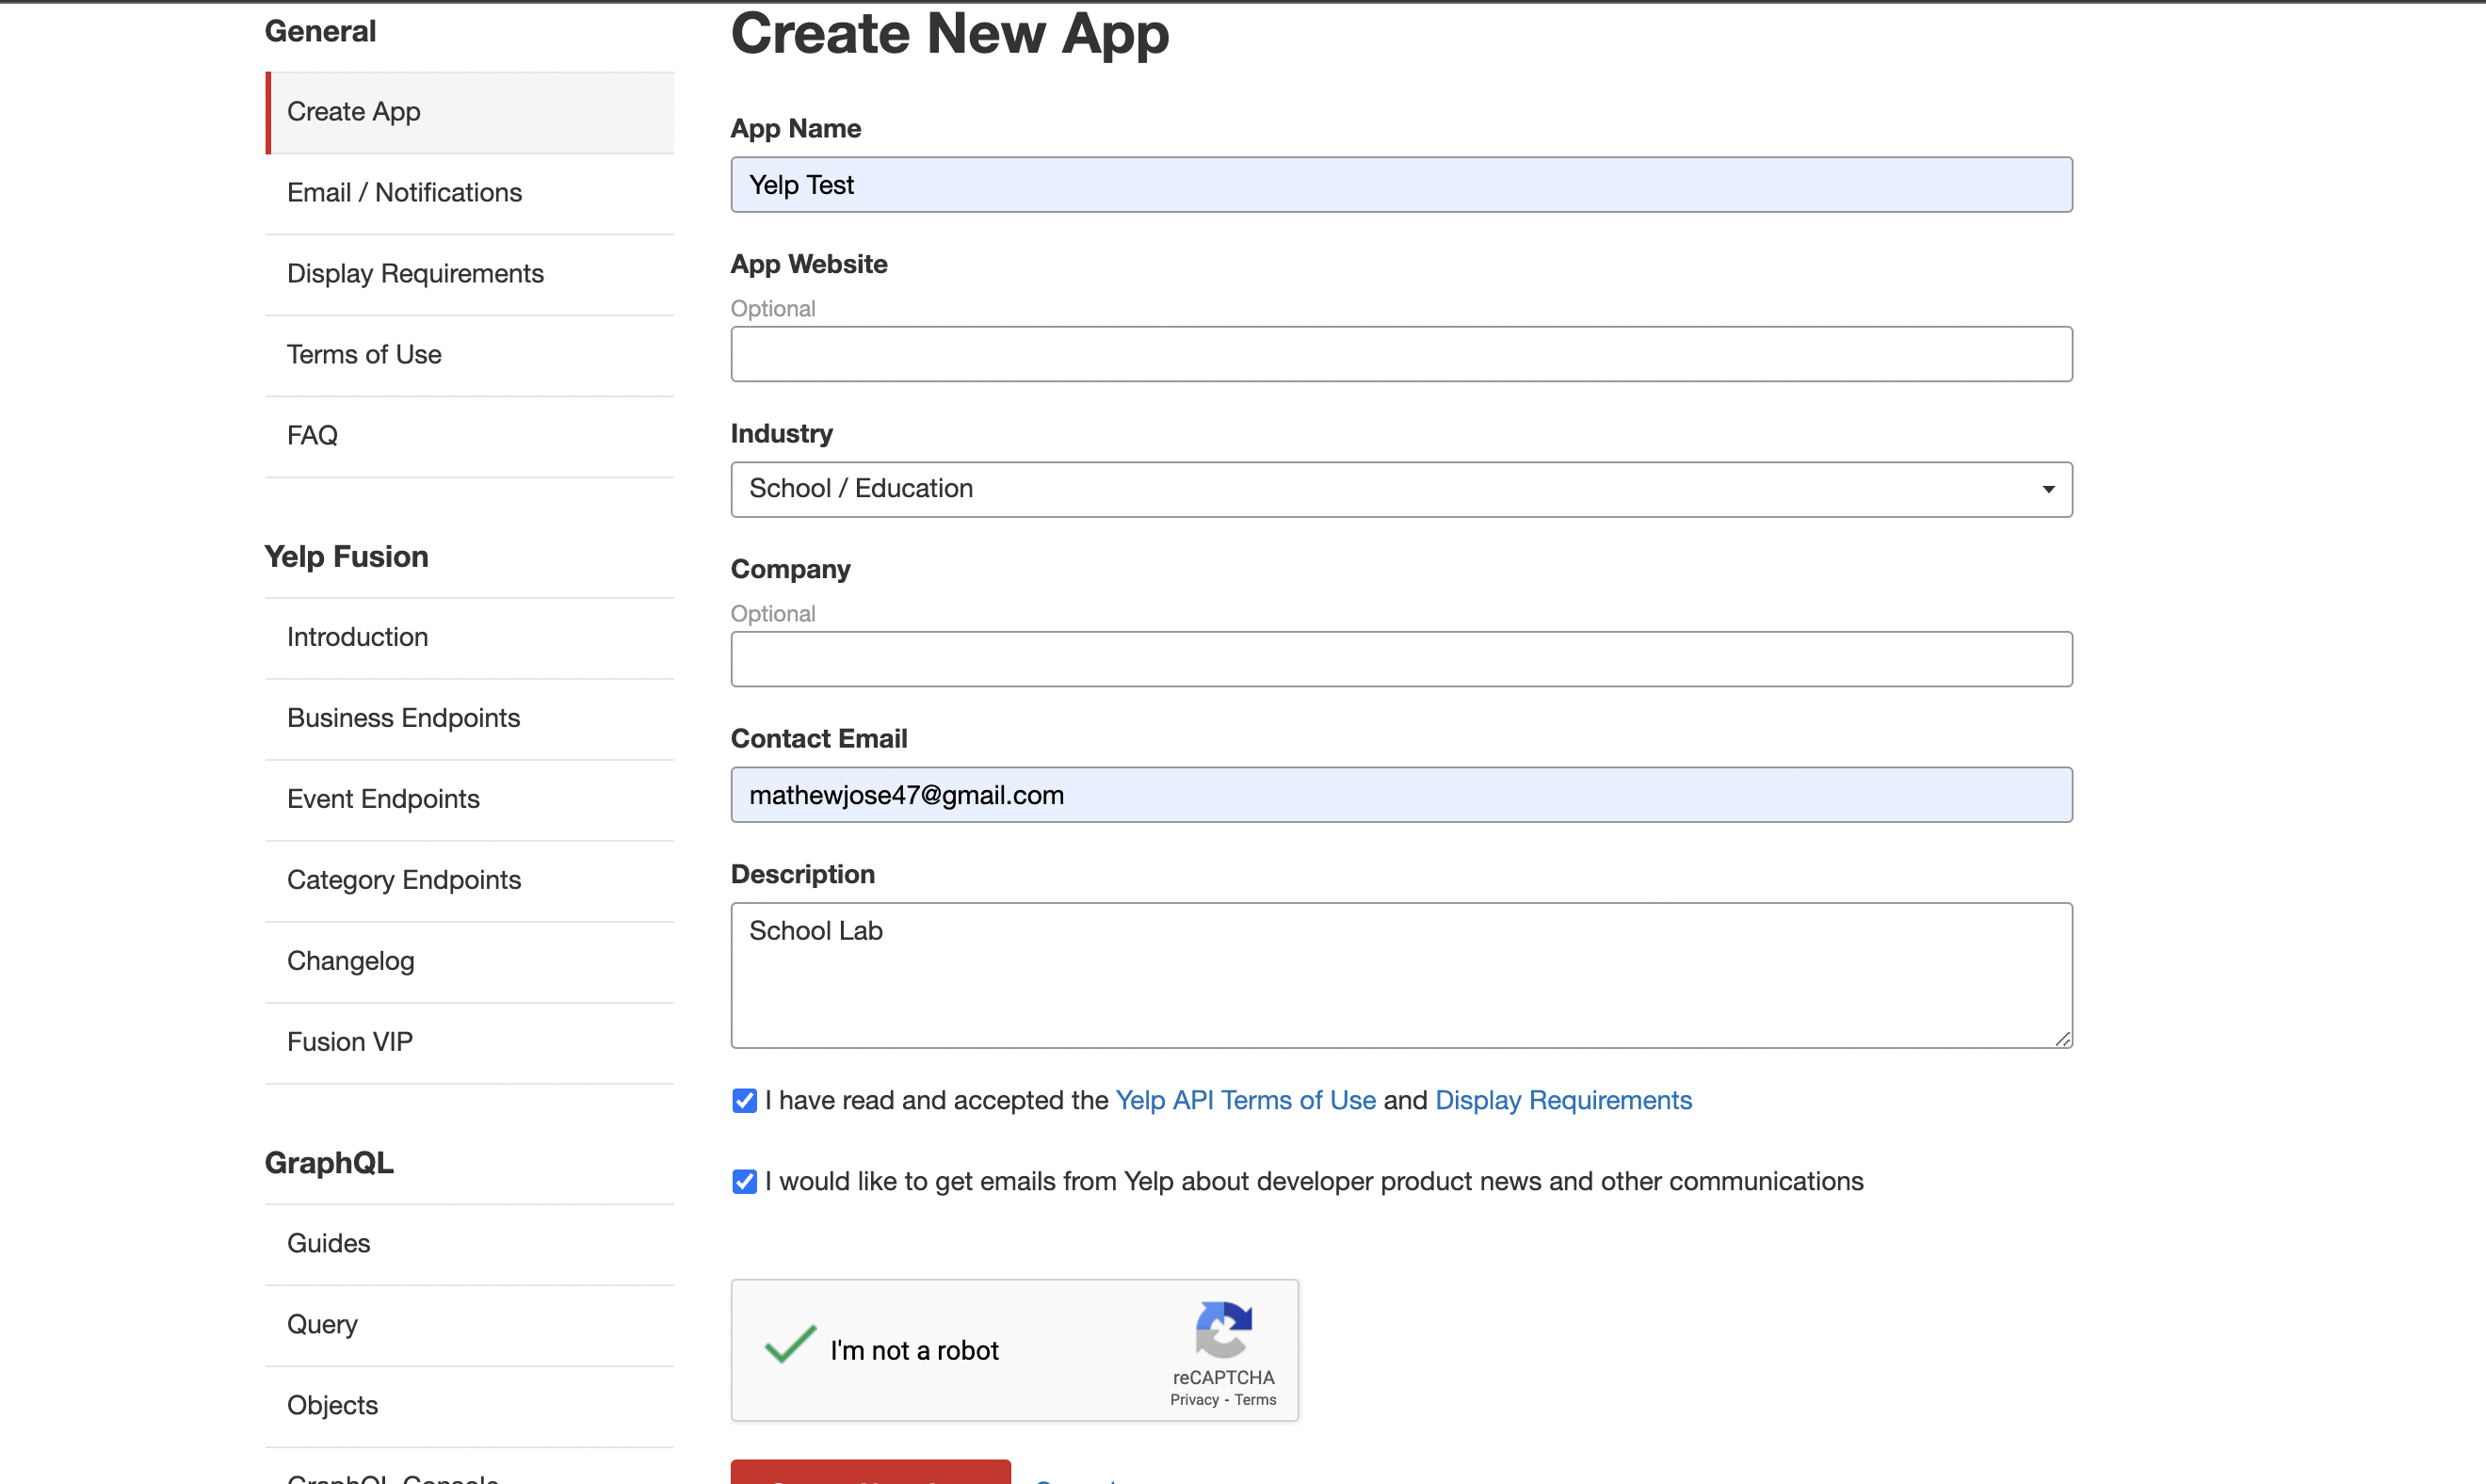



After creating the App, you will get your personal API key. You need to copy this for the next code cell.
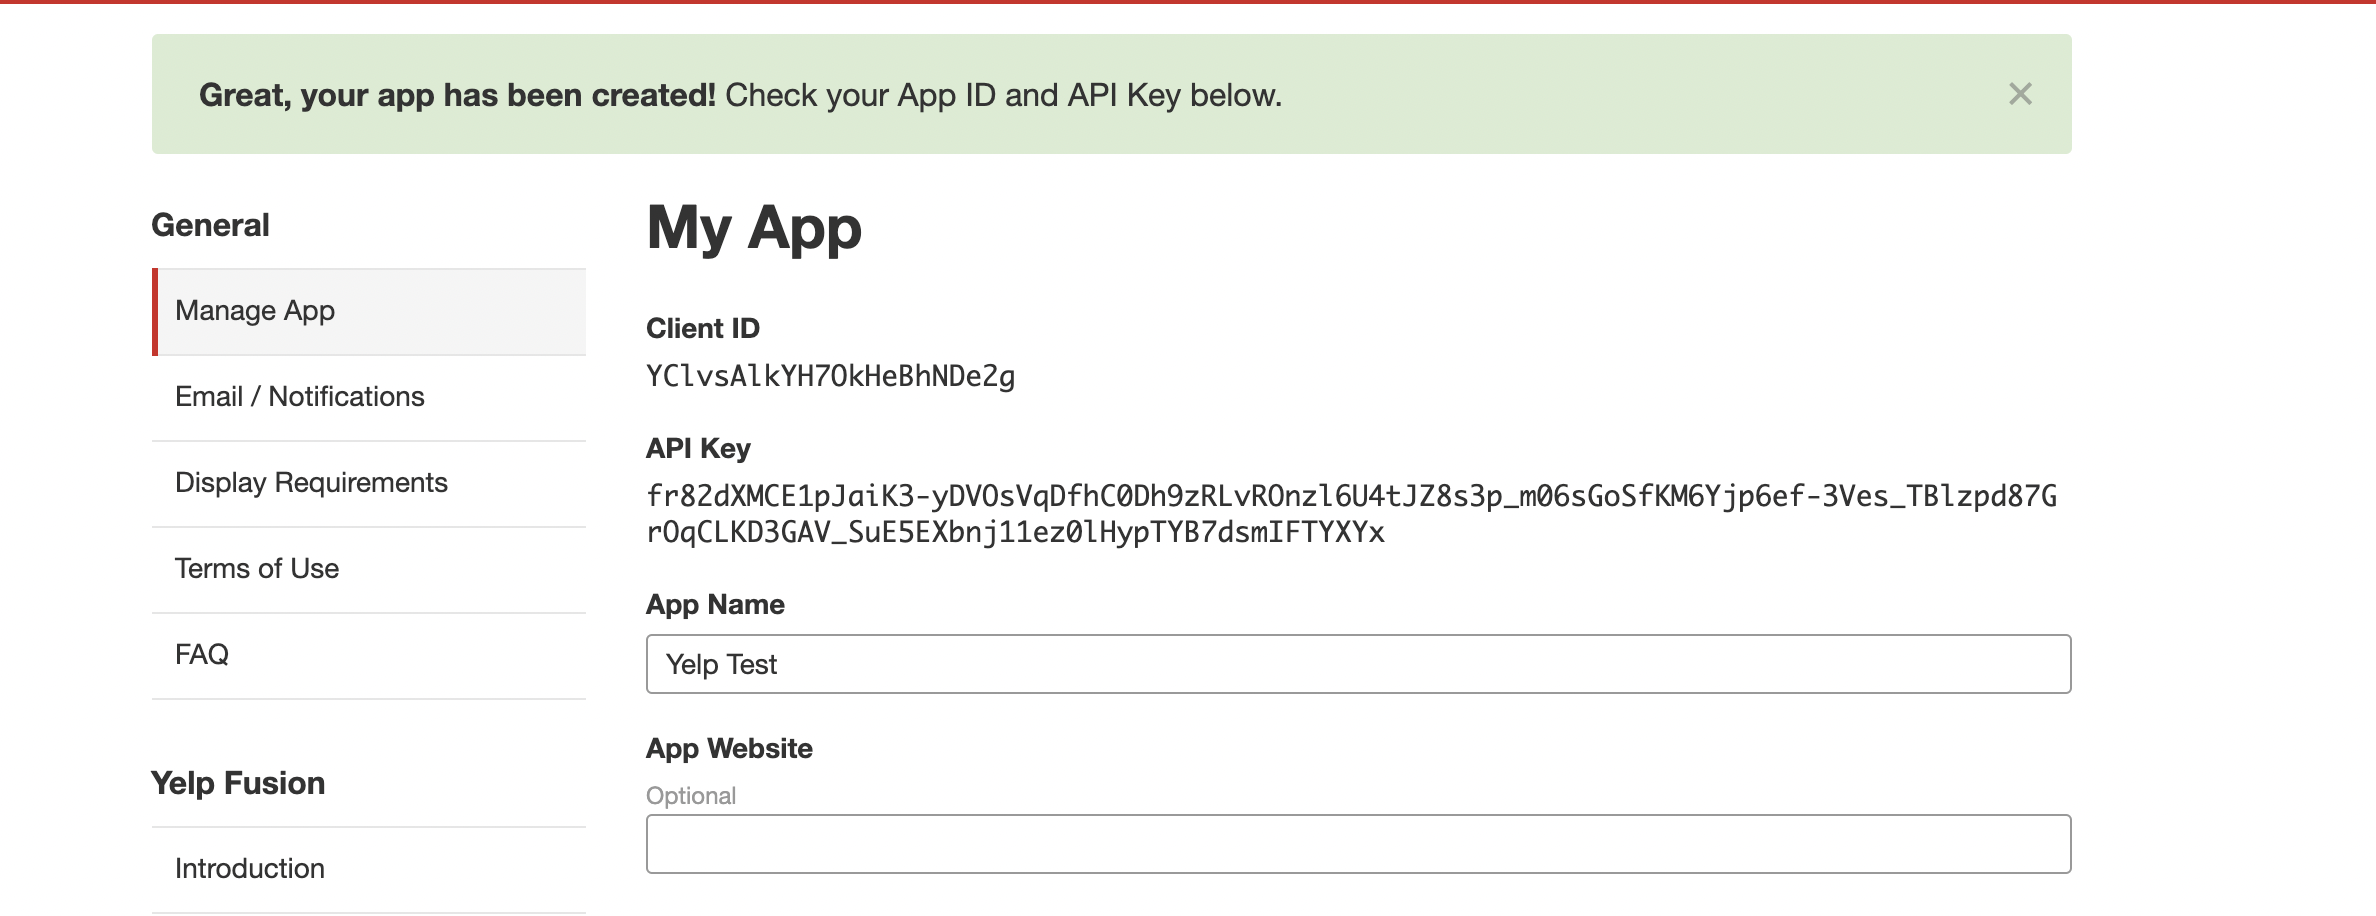

In [ ]:
# paste your api key in this variable

api_key = 'niCVc-ta9tp4QxeKfS68zKObapjBqtPfenoZ5Qoo-VnNH44Ynyz8kB_fcladIz6A5gDBdpkIgeBUFw32dSLw4EsMzd82kHLPpah0OGpfEasQJTcGLn2xVFr9vmUdYnYx'

In order to **GET** data from the API, we **request** it at a particular **search_api_url**. Before using the **GET** method, let’s collect all the information into separate variables that we will combine and send to the API. 
So a call to an API must have the following information
1. A URL from where it gets information. 
2. There are separate endpoints for different kinds of information. This is usually just a part of the URL
3. The API Key (usually transmitted in the header) 
4. The parameters for the search(params) 

You can read about the different ways you can search and get information at https://www.yelp.com/developers/documentation/v3/get_started



In [ ]:
# headers contain the api key defined in the previous cell
headers = {'Authorization': 'Bearer {}'.format(api_key)}

# the api endpoint url. This 
search_api_url = 'https://api.yelp.com/v3/businesses/search'

# inserting some parameters. Lets try and a list of 50 businesses with the term “coffee” located in ‘61820’, the main zip code for Champaign. 
#Review all parameters and documentation at https://www.yelp.com/developers/documentation/v3/business_search 
params = {'term': 'coffee', 
          'location': '61820',
          'limit': 50}

In [ ]:
# we can feed these variables into the "get"function
# we also set timeout = 5 to stop Requests from waiting for a response after 5 seconds.
response = requests.get(search_api_url, headers=headers, params=params, timeout=5)

# extract JSON data from the response
data = response.json()

# Load data to a data frame
df = pd.DataFrame(data['businesses'])

# display the top rows. Default value is 5. Lets view all 50. 
# Documentation for attributes available at https://www.yelp.com/developers/documentation/v3/business_search 
# Spend some time understanding all the attributes. 
df.head(50)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,MfJSKP5HRllfts13MiKs1g,flying-machine-avionics-champaign,Flying Machine Avionics,https://s3-media4.fl.yelpcdn.com/bphoto/VbI2OG...,False,https://www.yelp.com/biz/flying-machine-avioni...,41,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.5,"{'latitude': 40.11519, 'longitude': -88.23838}",[],$,"{'address1': '202 S 1st St', 'address2': '', '...",,,761.327592
1,B9W60PTxn7XOZfk4BiTvyw,brewlab-coffee-champaign,BrewLab Coffee,https://s3-media4.fl.yelpcdn.com/bphoto/8tGc9Y...,False,https://www.yelp.com/biz/brewlab-coffee-champa...,44,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.5,"{'latitude': 40.1106393, 'longitude': -88.2319...",[delivery],$$,"{'address1': '630 S 5th St', 'address2': None,...",+12176662770,(217) 666-2770,896.116476
2,gjDtBo28Qn4qJ5RxvKyW0Q,bakelab-urbana-2,Bakelab,https://s3-media3.fl.yelpcdn.com/bphoto/wBz2TK...,False,https://www.yelp.com/biz/bakelab-urbana-2?adju...,6,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",5.0,"{'latitude': 40.11598066367709, 'longitude': -...",[],NaN,"{'address1': '410 N Lincoln Ave', 'address2': ...",,,2094.870821
3,e0prCZXtHGQIKeQ_wTW3uw,cafe-kopi-champaign-3,Cafe Kopi,https://s3-media1.fl.yelpcdn.com/bphoto/TBzROY...,False,https://www.yelp.com/biz/cafe-kopi-champaign-3...,192,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.0,"{'latitude': 40.11682, 'longitude': -88.24271}","[delivery, pickup]",$,"{'address1': '109 N Walnut St', 'address2': ''...",+12173594266,(217) 359-4266,868.161472
4,WAAYgXdq-1zdo5Je-pq3kg,columbia-street-roastery-by-herriotts-champaign,Columbia Street Roastery By Herriott's,https://s3-media3.fl.yelpcdn.com/bphoto/S9dUmW...,False,https://www.yelp.com/biz/columbia-street-roast...,34,"[{'alias': 'coffeeroasteries', 'title': 'Coffe...",4.5,"{'latitude': 40.12127, 'longitude': -88.24213}",[delivery],$$,"{'address1': '24 Columbia St', 'address2': '',...",+12173529713,(217) 352-9713,1366.067490
5,BcrFZDyviqw_wF9oQQ5qVA,caffe-bene-champaign-3,Caffe Bene,https://s3-media3.fl.yelpcdn.com/bphoto/31d1Dq...,False,https://www.yelp.com/biz/caffe-bene-champaign-...,38,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.0,"{'latitude': 40.1106262207031, 'longitude': -8...",[],$$,"{'address1': '524 E Green St', 'address2': '',...",+12176072611,(217) 607-2611,959.549497
6,PiD4hteskHnFC4GowN34cw,espresso-royale-champaign,Espresso Royale,https://s3-media2.fl.yelpcdn.com/bphoto/HcrD-s...,False,https://www.yelp.com/biz/espresso-royale-champ...,42,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",3.0,"{'latitude': 40.0993108, 'longitude': -88.2445...","[delivery, pickup]",$,"{'address1': '1411 S Neil St', 'address2': Non...",+12176007907,(217) 600-7907,1083.025743
7,8BYJLNeidv2ARtARUXVu4Q,industrial-donut-savoy,Industrial Donut,https://s3-media2.fl.yelpcdn.com/bphoto/HA5_hC...,False,https://www.yelp.com/biz/industrial-donut-savo...,35,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...",4.5,"{'latitude': 40.0598, 'longitude': -88.252095}","[delivery, pickup]",$,"{'address1': '501 Commerce Dr', 'address2': No...",+12176071323,(217) 607-1323,5537.235698
8,pLBF8QrRkMicJcsjAqW7ag,walnut-street-tea-champaign,Walnut Street Tea,https://s3-media2.fl.yelpcdn.com/bphoto/oDNjqk...,False,https://www.yelp.com/biz/walnut-street-tea-cha...,31,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.5,"{'latitude': 40.1154721496324, 'longitude': -8...",[],$$,"{'address1': '115 S Walnut St', 'address2': ''...",+12173516975,(217) 351-6975,722.913525
9,5ie-dY4FWa_w7MkU01YvzQ,cafeteria-and-company-urbana,Cafeteria & Company,https://s3-media1.fl.yelpcdn.com/bphoto/_D0GS3...,False,https://www.yelp.com/biz/cafeteria-and-company...,19,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",3.5,"{'latitude': 40.1126999, 'longitude': -88.20932}",[],$,"{'address1': '208 W Main St', 'address2': None...",,,2824.713817


**For the lab you need to do the following**
1.  Try out the Businesses Endpoint with three different types of queries. Change the 'params' and write the code in three separate cells. Convert the JSON output to Dataframes and show the top 5 rows. 
2. Try out one more endpoint(besides 'Businesses') from the list at https://www.yelp.com/developers/documentation/v3/get_started and create two queries (two sets of parameters). Create separate cells for each of these two paramerts. Convert the JSON output to Dataframes and show the top 5 rows. 
3. Submit in the class participation assignment. 

In [ ]:
# headers contain the api key defined in the previous cell
headers = {'Authorization': 'Bearer {}'.format(api_key)}

# the api endpoint url. This 
search_api_url = 'https://api.yelp.com/v3/businesses/search'

# inserting some parameters. Lets try and a list of 50 businesses with the term “coffee” located in ‘61820’, the main zip code for Champaign. 
#Review all parameters and documentation at https://www.yelp.com/developers/documentation/v3/business_search 
params = {'term': 'Pizza', 
          'location': 'Urbana',
          'limit': 50}

# we can feed these variables into the "get"function
# we also set timeout = 5 to stop Requests from waiting for a response after 5 seconds.
response = requests.get(search_api_url, headers=headers, params=params, timeout=5)

# extract JSON data from the response
data = response.json()

# Load data to a data frame
df = pd.DataFrame(data['businesses'])

# display the top rows. Default value is 5. Lets view all 50. 
# Documentation for attributes available at https://www.yelp.com/developers/documentation/v3/business_search 
# Spend some time understanding all the attributes. 
df.head(5)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,CrIWqmuO2uQWwl3z11K_BA,pizzeria-antica-champaign,Pizzeria Antica,https://s3-media1.fl.yelpcdn.com/bphoto/C27Y-l...,False,https://www.yelp.com/biz/pizzeria-antica-champ...,162,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 40.11686, 'longitude': -88.24296}",[delivery],$$,"{'address1': '10 E Chester St', 'address2': No...",+12175304137,(217) 530-4137,3400.881116
1,rXIDrS8Rz8r09vH4gjHfGQ,manolos-pizza-and-empanadas-urbana,Manolo's Pizza & Empanadas,https://s3-media4.fl.yelpcdn.com/bphoto/sD6KxM...,False,https://www.yelp.com/biz/manolos-pizza-and-emp...,122,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",4.0,"{'latitude': 40.1068635052099, 'longitude': -8...","[pickup, delivery]",$,"{'address1': '1115 W Oregon St', 'address2': '...",+12173650110,(217) 365-0110,1821.720622
2,u8C8pRvaHXg3PgDrsUHJHQ,papa-dels-pizza-champaign-4,Papa Del's Pizza,https://s3-media1.fl.yelpcdn.com/bphoto/by3SGx...,False,https://www.yelp.com/biz/papa-dels-pizza-champ...,481,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",3.5,"{'latitude': 40.1032417, 'longitude': -88.2441...",[delivery],$$,"{'address1': '1201 S Neil St', 'address2': '',...",+12173597700,(217) 359-7700,3624.318512
3,RucrUwlX6hvGlUOrakViYw,baldarottas-porketta-and-sicilian-sausage-urbana,Baldarotta's Porketta & Sicilian Sausage,https://s3-media2.fl.yelpcdn.com/bphoto/ASQ6Hk...,False,https://www.yelp.com/biz/baldarottas-porketta-...,50,"[{'alias': 'sandwiches', 'title': 'Sandwiches'...",4.5,"{'latitude': 40.11061, 'longitude': -88.20704}","[pickup, delivery]",NaN,"{'address1': '300 S Broadway Ave', 'address2':...",+12178005726,(217) 800-5726,369.327034
4,sjpsGKPABZDnABCv3wYtUQ,rosatis-pizza-urbana-2,Rosati's Pizza,https://s3-media4.fl.yelpcdn.com/bphoto/2M6cg1...,False,https://www.yelp.com/biz/rosatis-pizza-urbana-...,75,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",3.0,"{'latitude': 40.106751608927524, 'longitude': ...","[pickup, delivery]",$,"{'address1': '701 S Gregory St', 'address2': '...",+12175521202,(217) 552-1202,1693.935411


In [ ]:
# headers contain the api key defined in the previous cell
headers = {'Authorization': 'Bearer {}'.format(api_key)}

# the api endpoint url. This 
search_api_url = 'https://api.yelp.com/v3/businesses/search'

# inserting some parameters. Lets try and a list of 50 businesses with the term “coffee” located in ‘61820’, the main zip code for Champaign. 
#Review all parameters and documentation at https://www.yelp.com/developers/documentation/v3/business_search 
params = {'term': 'Seafood', 
          'location': 'NYC',
          'limit': 5,
          'attribute' : 'hot_and_new'}

# we can feed these variables into the "get"function
# we also set timeout = 5 to stop Requests from waiting for a response after 5 seconds.
response = requests.get(search_api_url, headers=headers, params=params, timeout=5)

# extract JSON data from the response
data = response.json()

# Load data to a data frame
df = pd.DataFrame(data['businesses'])

# display the top rows. Default value is 5. Lets view all 50. 
# Documentation for attributes available at https://www.yelp.com/developers/documentation/v3/business_search 
# Spend some time understanding all the attributes. 
df.head(5)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,YvWQMlMjtYmVmheH97tTlQ,crab-house-all-you-can-eat-seafood-new-york,Crab House All You Can Eat Seafood,https://s3-media2.fl.yelpcdn.com/bphoto/1J0qtJ...,False,https://www.yelp.com/biz/crab-house-all-you-ca...,308,"[{'alias': 'buffets', 'title': 'Buffets'}, {'a...",4.5,"{'latitude': 40.759664, 'longitude': -73.969776}","[pickup, delivery]",$$$$,"{'address1': '135 E 55th St', 'address2': None...",+12129330264,(212) 933-0264,6381.672940
1,6jPju63RQy3P3ov9-ejP7g,sea-wolf-williamsburg-waterfront-brooklyn,Sea Wolf - Williamsburg Waterfront,https://s3-media3.fl.yelpcdn.com/bphoto/oTb3rG...,False,https://www.yelp.com/biz/sea-wolf-williamsburg...,178,"[{'alias': 'seafood', 'title': 'Seafood'}]",4.0,"{'latitude': 40.709946, 'longitude': -73.968608}","[pickup, delivery]",$$$,"{'address1': '420 Kent Ave', 'address2': None,...",+17182332792,(718) 233-2792,2222.127845
2,LpVbI-E9C-CSp7WhU5h2Iw,fishmarket-restaurant-new-york,Fishmarket Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/zIPbOb...,False,https://www.yelp.com/biz/fishmarket-restaurant...,586,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.5,"{'latitude': 40.70717, 'longitude': -74.00192}",[delivery],$$,"{'address1': '111 South St', 'address2': '', '...",+19173638101,(917) 363-8101,667.940697
3,hfMtSdxRsC3JQP3yrm6nag,claw-daddys-new-york,Claw Daddy's,https://s3-media3.fl.yelpcdn.com/bphoto/RCru71...,False,https://www.yelp.com/biz/claw-daddys-new-york?...,1811,"[{'alias': 'cajun', 'title': 'Cajun/Creole'}, ...",4.0,"{'latitude': 40.722071, 'longitude': -73.98847}","[pickup, delivery, restaurant_reservation]",$$$,"{'address1': '185 Orchard St', 'address2': '',...",+16465906816,(646) 590-6816,1912.778790
4,wRHUJ69-f4CiV5BRY72mUg,aqua-boil-new-york-2,Aqua Boil,https://s3-media2.fl.yelpcdn.com/bphoto/nHGfFX...,False,https://www.yelp.com/biz/aqua-boil-new-york-2?...,485,"[{'alias': 'seafood', 'title': 'Seafood'}, {'a...",4.5,"{'latitude': 40.763702, 'longitude': -73.988386}","[pickup, delivery, restaurant_reservation]",$$,"{'address1': '750 9th Ave', 'address2': '', 'a...",+12124647428,(212) 464-7428,6497.896611


In [ ]:
# headers contain the api key defined in the previous cell
headers = {'Authorization': 'Bearer {}'.format(api_key)}

# the api endpoint url. This 
search_api_url = 'https://api.yelp.com/v3/businesses/search'

# inserting some parameters. Lets try and a list of 50 businesses with the term “coffee” located in ‘61820’, the main zip code for Champaign. 
#Review all parameters and documentation at https://www.yelp.com/developers/documentation/v3/business_search 
params = {'term': 'Indian', 
          'location': 'California',
          'limit': 5,
          'attribute' : 'hot_and_new',
          'price' : '1,2,3'}

# we can feed these variables into the "get"function
# we also set timeout = 5 to stop Requests from waiting for a response after 5 seconds.
response = requests.get(search_api_url, headers=headers, params=params, timeout=5)

++++++++++++++++++++++++++++++++++++# extract JSON data from the response
data = response.json()

# Load data to a data frame
df = pd.DataFrame(data['businesses'])

# display the top rows. Default value is 5. Lets view all 50. 
# Documentation for attributes available at https://www.yelp.com/developers/documentation/v3/business_search 
# Spend some time understanding all the attributes. 
df.head(5)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,JP3X1akkyUa0fwDPlZxQuQ,tandoori-express-oakhurst,Tandoori Express,https://s3-media1.fl.yelpcdn.com/bphoto/gPmhYM...,False,https://www.yelp.com/biz/tandoori-express-oakh...,137,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,"{'latitude': 37.333745, 'longitude': -119.649773}",[],$$,"{'address1': '40278 Rd 425A', 'address2': 'Uni...",+15596833363,(559) 683-3363,31291.188899
1,p0wRA1tTQxoqurFZVIOQOA,picayune-rancheria-indian-tacos-coarsegold-2,Picayune Rancheria Indian tacos,https://s3-media4.fl.yelpcdn.com/bphoto/CGfKqI...,False,https://www.yelp.com/biz/picayune-rancheria-in...,27,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",5.0,"{'latitude': 37.214007, 'longitude': -119.685251}",[],$,"{'address1': 'Rd 417 Picayune Rancheria', 'add...",+15593608068,(559) 360-8068,34079.468836
2,kw23UaOsjz5NFi5RYs1uTw,india-express-sweet-and-spice-fowler-2,India Express - Sweet & Spice,https://s3-media2.fl.yelpcdn.com/bphoto/BA8xNK...,False,https://www.yelp.com/biz/india-express-sweet-a...,58,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",5.0,"{'latitude': 36.62982, 'longitude': -119.68282}","[pickup, delivery]",$,"{'address1': '208 N 8th St', 'address2': None,...",+15598341300,(559) 834-1300,78329.670554
3,HYKaLdOzR2m4YBDLQIstOg,maharaja-sweets-and-spices-clovis,Maharaja Sweets & Spices,https://s3-media3.fl.yelpcdn.com/bphoto/ZZG-83...,False,https://www.yelp.com/biz/maharaja-sweets-and-s...,107,"[{'alias': 'indpak', 'title': 'Indian'}]",4.5,"{'latitude': 36.8385360391627, 'longitude': -1...",[pickup],$$,"{'address1': '435 N Clovis Ave', 'address2': '...",+15593251300,(559) 325-1300,59057.229725
4,VkteyGPBExOgbJDNiVqpFA,slice-of-india-clovis-2,Slice of India,https://s3-media3.fl.yelpcdn.com/bphoto/93Z0aD...,False,https://www.yelp.com/biz/slice-of-india-clovis...,309,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",4.5,"{'latitude': 36.85358, 'longitude': -119.72805}",[delivery],$$,"{'address1': '1345 N Willow Ave', 'address2': ...",+15593256155,(559) 325-6155,59268.280835


In [ ]:
# headers contain the api key defined in the previous cell
headers = {'Authorization': 'Bearer {}'.format(api_key)}

# the api endpoint url. This 
search_api_url = 'https://api.yelp.com/v3/businesses/JP3X1akkyUa0fwDPlZxQuQ'

# inserting some parameters. Lets try and a list of 50 businesses with the term “coffee” located in ‘61820’, the main zip code for Champaign. 
#Review all parameters and documentation at https://www.yelp.com/developers/documentation/v3/business_search 
params = {}

# we can feed these variables into the "get"function
# we also set timeout = 5 to stop Requests from waiting for a response after 5 seconds.
response = requests.get(search_api_url, headers=headers, params=params, timeout=5)

# extract JSON data from the response
data = response.json()

# Load data to a data frame
df = pd.DataFrame(data['hours'])

# display the top rows. Default value is 5. Lets view all 50. 
# Documentation for attributes available at https://www.yelp.com/developers/documentation/v3/business_search 
# Spend some time understanding all the attributes. 
df.head(5)

,open,hours_type,is_open_now
0,"[{'is_overnight': False, 'start': '1200', 'end...",REGULAR,True


In [ ]:
# headers contain the api key defined in the previous cell
headers = {'Authorization': 'Bearer {}'.format(api_key)}

# the api endpoint url. This 
search_api_url = 'https://api.yelp.com/v3/businesses/search/phone'

# inserting some parameters. Lets try and a list of 50 businesses with the term “coffee” located in ‘61820’, the main zip code for Champaign. 
#Review all parameters and documentation at https://www.yelp.com/developers/documentation/v3/business_search 
params = {'phone': '+15596833363'}

# we can feed these variables into the "get"function
# we also set timeout = 5 to stop Requests from waiting for a response after 5 seconds.
response = requests.get(search_api_url, headers=headers, params=params, timeout=5)

# extract JSON data from the response
data = response.json()

# Load data to a data frame
df = pd.DataFrame(data['businesses'])

# display the top rows. Default value is 5. Lets view all 50. 
# Documentation for attributes available at https://www.yelp.com/developers/documentation/v3/business_search 
# Spend some time understanding all the attributes. 
df.head(5)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone
0,JP3X1akkyUa0fwDPlZxQuQ,tandoori-express-oakhurst,Tandoori Express,https://s3-media0.fl.yelpcdn.com/bphoto/gPmhYM...,False,https://www.yelp.com/biz/tandoori-express-oakh...,137,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,"{'latitude': 37.333745, 'longitude': -119.649773}",[],$$,"{'address1': '40278 Rd 425A', 'address2': 'Uni...",+15596833363,(559) 683-3363


In [ ]:
# headers contain the api key defined in the previous cell
headers = {'Authorization': 'Bearer {}'.format(api_key)}

# the api endpoint url. This 
search_api_url = 'https://api.yelp.com/v3/businesses/search/phone'

# inserting some parameters. Lets try and a list of 50 businesses with the term “coffee” located in ‘61820’, the main zip code for Champaign. 
#Review all parameters and documentation at https://www.yelp.com/developers/documentation/v3/business_search 
params = {'phone': '+15596833363'}

# we can feed these variables into the "get"function
# we also set timeout = 5 to stop Requests from waiting for a response after 5 seconds.
response = requests.get(search_api_url, headers=headers, params=params, timeout=5)

# extract JSON data from the response
data = response.json()

# Load data to a data frame
df = pd.DataFrame(data['businesses'])

# display the top rows. Default value is 5. Lets view all 50. 
# Documentation for attributes available at https://www.yelp.com/developers/documentation/v3/business_search 
# Spend some time understanding all the attributes. 
df.head(5)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone
0,JP3X1akkyUa0fwDPlZxQuQ,tandoori-express-oakhurst,Tandoori Express,https://s3-media0.fl.yelpcdn.com/bphoto/gPmhYM...,False,https://www.yelp.com/biz/tandoori-express-oakh...,137,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,"{'latitude': 37.333745, 'longitude': -119.649773}",[],$$,"{'address1': '40278 Rd 425A', 'address2': 'Uni...",+15596833363,(559) 683-3363


In [ ]:
# headers contain the api key defined in the previous cell
headers = {'Authorization': 'Bearer {}'.format(api_key)}

# the api endpoint url. This 
search_api_url = 'https://api.yelp.com/v3/events'

# inserting some parameters. Lets try and a list of 50 businesses with the term “coffee” located in ‘61820’, the main zip code for Champaign. 
#Review all parameters and documentation at https://www.yelp.com/developers/documentation/v3/business_search 
params = {'sort_by' : 'desc',
          'is_free' : True}

# we can feed these variables into the "get"function
# we also set timeout = 5 to stop Requests from waiting for a response after 5 seconds.
response = requests.get(search_api_url, headers=headers, params=params, timeout=5)

# extract JSON data from the response
data = response.json()

# Load data to a data frame
df = pd.DataFrame(data['events'])

# display the top rows. Default value is 5. Lets view all 50. 
# Documentation for attributes available at https://www.yelp.com/developers/documentation/v3/business_search 
# Spend some time understanding all the attributes. 
df.head(5)

,attending_count,category,cost,cost_max,description,event_site_url,id,image_url,interested_count,is_canceled,is_free,is_official,latitude,longitude,name,tickets_url,time_end,time_start,location,business_id
0,5543,other,None,None,What the heck is this? Simple: an essential li...,https://www.yelp.com/events/manhattan-yelps-49...,manhattan-yelps-49-things-to-do-in-2015,https://s3-media4.fl.yelpcdn.com/ephoto/0UIuzx...,3216,False,True,True,40.738832,-73.981534,Yelp's 49 Things To Do In 2015,None,2015-12-31T23:30:00-05:00,2015-12-21T06:30:00-05:00,"{'address1': '', 'address2': '', 'address3': '...",None
1,5763,other,None,None,"What the heck is this? Back by popular demand,...",https://www.yelp.com/events/new-york-yelps-51-...,new-york-yelps-51-things-to-do-in-2016,https://s3-media3.fl.yelpcdn.com/ephoto/5lHM0s...,3262,False,True,True,40.783260,-73.964656,Yelp's 51 Things To Do In 2016,None,2016-12-31T23:30:00-05:00,2016-12-05T00:30:00-05:00,"{'address1': '', 'address2': '', 'address3': '...",borough-of-manhattan-new-york
2,5145,other,None,None,"What the heck is this? Back by popular demand,...",https://www.yelp.com/events/new-york-yelps-52-...,new-york-yelps-52-things-to-do-in-2017,https://s3-media1.fl.yelpcdn.com/ephoto/cD9u5u...,2852,False,True,False,40.783260,-73.964656,Yelp's 52 Things To Do In 2017,None,2017-12-31T23:30:00-05:00,2017-12-08T00:00:00-05:00,"{'address1': '', 'address2': '', 'address3': '...",borough-of-manhattan-new-york
